# Classificação dos Dígitos 1 x 5

### Alunos:

- Caio Lucas da Silva Chacon - 20200025769
- Luiz Fernando Costa dos Santos - 20200025446

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import src.linear_models as lm
import src.classifier_1x5_utils as utils
import src.metrics as metrics
from sklearn.metrics import plot_confusion_matrix

In [2]:
train = pd.read_csv("./data/train_redu.csv")
test = pd.read_csv("./data/test_redu.csv")

# Selecionando apenas 1 e 5

In [3]:
train1x5 = utils.filter_1x5(train)
test1x5 = utils.filter_1x5(test)

# Plot

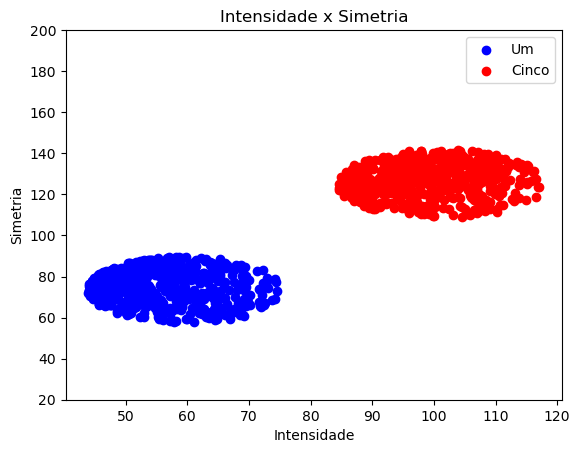

In [4]:
utils.plot1x5(train1x5)

# Treinamento

In [5]:
X_train = train1x5[["intensidade", "simetria"]].values
y_train = train1x5["label"].map(lambda x: -1 if x == 5 else 1).values
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

X_test = test1x5[["intensidade", "simetria"]].values
y_test = test1x5["label"].values
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [6]:
linear_reg = lm.LinearRegression()
linear_reg.fit(X_train, y_train)

In [7]:
logistic_reg = lm.LogisticRegression(eta=0.1, bs=512, tmax=1000000)
logistic_reg.fit(X_train, y_train)

In [8]:
pocket_pla = lm.PocketPLA(1500000)
pocket_pla.fit(X_train, y_train)

# Predição

In [9]:
transform_digits = lambda x: 5 if x == -1 else 1

y_pred_linr = list(map(transform_digits, linear_reg.predict(X_test)))
y_pred_logr = list(map(transform_digits, logistic_reg.predict(X_test)))
y_pred_pla = list(map(transform_digits, pocket_pla.predict(X_test)))

### Regressão Linear

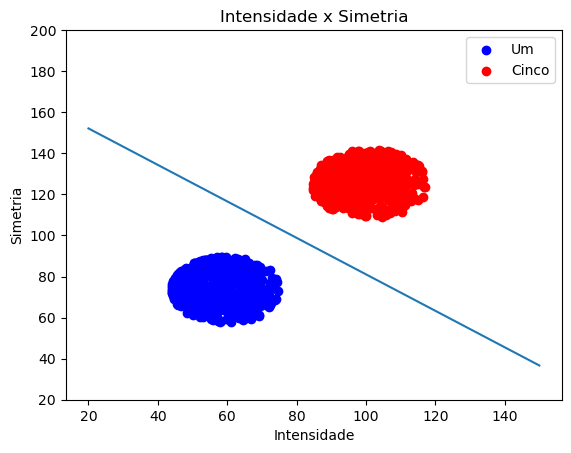

In [10]:
utils.plot1x5(train1x5, linear_reg.get_w())

### Regressão Logística

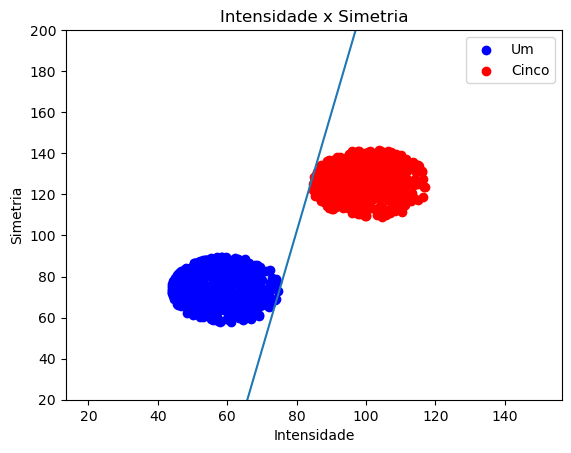

In [11]:
utils.plot1x5(train1x5, logistic_reg.get_w())

### Perceptron

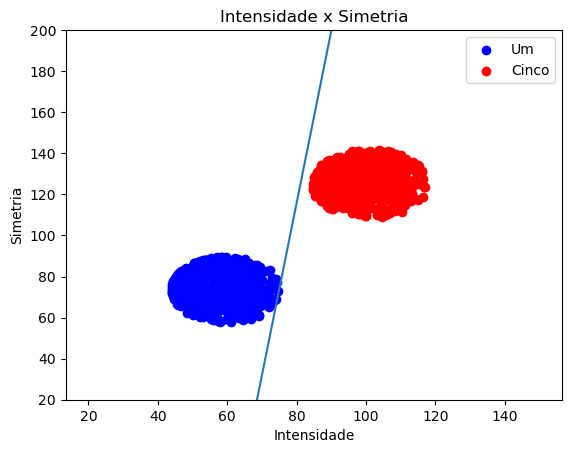

In [12]:
utils.plot1x5(train1x5, pocket_pla.get_w())

# Avaliação

### Matriz de Confusão

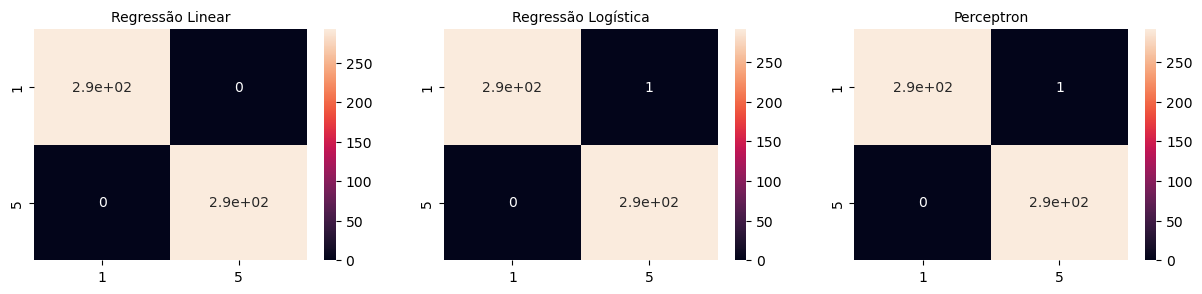

In [13]:
classes = [1, 5]
classes_str = ["1", "5"]
cm_1 = metrics.confusion_matrix(y_test, y_pred_linr, classes)
cm_2 = metrics.confusion_matrix(y_test, y_pred_logr, classes)
cm_3 = metrics.confusion_matrix(y_test, y_pred_pla, classes)

df_cm_1 = pd.DataFrame(cm_1, index=classes_str, columns=classes_str)
df_cm_2 = pd.DataFrame(cm_2, index=classes_str, columns=classes_str)
df_cm_3 = pd.DataFrame(cm_3, index=classes_str, columns=classes_str)

fig, ax = plt.subplots(figsize = (15,3), nrows=1, ncols=3)
sn.heatmap(df_cm_1, annot=True, ax=ax[0])
sn.heatmap(df_cm_2, annot=True, ax=ax[1])
sn.heatmap(df_cm_3, annot=True, ax=ax[2])
ax[0].set_title("Regressão Linear", fontsize=10)
ax[1].set_title("Regressão Logística", fontsize=10)
ax[2].set_title("Perceptron", fontsize=10)
plt.show()

### Classification Reports

In [14]:
print("Regressão Linear\n")
print(metrics.classification_report(cm_1))
print("\nRegressão Logística\n")
print(metrics.classification_report(cm_2))
print("\nPerceptron\n")
print(metrics.classification_report(cm_3))

Regressão Linear

   accuracy  precision  recall  f1-score
0       1.0        1.0     1.0       1.0
1       1.0        1.0     1.0       1.0

Regressão Logística

   accuracy  precision    recall  f1-score
0       1.0   1.000000  0.996575  0.998285
1       1.0   0.996575  1.000000  0.998285

Perceptron

   accuracy  precision    recall  f1-score
0       1.0   1.000000  0.996575  0.998285
1       1.0   0.996575  1.000000  0.998285
